### Data Understanding and Exploration

In [1]:
#import the libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import os
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#read the provided file
housedf=pd.read_csv('C:\\Users\\bhavit\\Downloads\\train.csv')
housedf.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL         65.0     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd       2003.0          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL         80.0     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd       1976.0          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL         68.0    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd       2001.0          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL         60.0     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

In [3]:
#Understand the columns in data
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Handling null & missing in dataframe

In [4]:
#Sum of null value in our dataframe
housedf.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
housedf.shape

(1460, 81)

In [6]:
null = pd.DataFrame(round(housedf.isnull().sum()/len(housedf.index)*100,2).sort_values(ascending=False),columns=["Null perc"])
null.index.name = 'features_col'
null.head()

Null perc
features_col           
PoolQC            99.52
MiscFeature       96.30
Alley             93.77
Fence             80.75
FireplaceQu       47.26

In [7]:
# dataframe with features having null values
null_df = null[null["Null perc"] > 0]
null_df

Null perc
features_col           
PoolQC            99.52
MiscFeature       96.30
Alley             93.77
Fence             80.75
FireplaceQu       47.26
LotFrontage       17.74
GarageYrBlt        5.55
GarageCond         5.55
GarageType         5.55
GarageFinish       5.55
GarageQual         5.55
BsmtFinType2       2.60
BsmtExposure       2.60
BsmtQual           2.53
BsmtCond           2.53
BsmtFinType1       2.53
MasVnrArea         0.55
MasVnrType         0.55
Electrical         0.07

In [8]:
# we will drop the 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu'column becuase there are so many missing values and id column is not required
housedf = housedf.drop(['PoolQC','MiscFeature','Id','Alley','Fence','FireplaceQu'],axis=1)

In [9]:
#post dropping of columns following is data shape
housedf.shape

(1460, 75)

In [10]:
null = pd.DataFrame(round(housedf.isnull().sum()/len(housedf.index)*100,2).sort_values(ascending=False),columns=["Null perc"])
null.index.name = 'features_col'
null_df = null[null["Null perc"] > 0]
null_df

Null perc
features_col           
LotFrontage       17.74
GarageType         5.55
GarageYrBlt        5.55
GarageFinish       5.55
GarageQual         5.55
GarageCond         5.55
BsmtFinType2       2.60
BsmtExposure       2.60
BsmtQual           2.53
BsmtCond           2.53
BsmtFinType1       2.53
MasVnrArea         0.55
MasVnrType         0.55
Electrical         0.07

In [11]:
#following is list of columns in house dataframe
housedf.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
 

In [12]:
#Following is categorical columns
housedf.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [13]:
#Following is  Numeric columns
housedf.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [17]:
l2= housedf.select_dtypes(include=['float64', 'int64'])
l2.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype='object')

In [19]:
for i in l2:
    print(housedf[i].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
79.0      17
55.0      17
72.0      17
63.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
43.0      12
40.0      12
71.0      12
67.0      12
57.0      12
76.0      11
69.0      11
92.0      10
53.0      10
88.0      10
34.0      10
86.0      10
84.0       9
77.0       9
35.0       9
44.0       9
62.0       9
61.0       8
98.0       8
96.0       8
93.0       8
58.0       7
120.0      7
95.0       7
107.0      7
91.0       6
110.0      6
41.0       6
81.0       6
89.0       6
30.0       6
105.0      6
36.0       6
94.0       6
54.0       6
48.0       6
87.0       

In [20]:

# for the LotFrontage column and GarageYrBlt we will impute the missing values with the median since the feature contains outliers
housedf['LotFrontage'] = housedf['LotFrontage'].fillna(housedf['LotFrontage'].median())

housedf['GarageYrBlt'] = housedf['GarageYrBlt'].fillna(housedf['GarageYrBlt'].median())

# for the "below columns" we will impute the null values with 'mode'
for col in ('GarageCond', 'GarageType', 'GarageFinish','GarageQual'):
    
    housedf[col] = housedf[col].fillna(housedf[col].mode()[0])
    
# for the "Bsmt" columns we will impute the null values with 'mode'
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual'):
    
    housedf[col] = housedf[col].fillna(housedf[col].mode()[0])
    
# for the columns we will impute the null values with 'mode'

for col in ('MasVnrArea', 'MasVnrType', 'Electrical'):
    
    housedf[col] = housedf[col].fillna(housedf[col].mode()[0])

    


In [21]:
null = pd.DataFrame(round(housedf.isnull().sum()/len(housedf.index)*100,2).sort_values(ascending=False),columns=["Null perc"])
null.index.name = 'features_col'
null_df = null[null["Null perc"] > 0]
null_df

Empty DataFrame
Columns: [Null perc]
Index: []

In [23]:
# checking for the presence of any more null values
housedf.isnull().values.any()

False

In [24]:
# Check the shape
housedf.shape

(1460, 75)

In [25]:
housedf.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110     3.409589    15.060959     2.758904     43.489041     6.321918  2007.815753  180921.195890
std      42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    29.317331    55.757415    40.177307    496.123024     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     0.000000     0.000000      0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     0.000000     0.000000      0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     0.000000     0.000000      0.000000     8.000000  2009.000000  214000.000000


In [27]:
print(housedf['PoolArea'].value_counts())
print(housedf['MiscVal'].value_counts())
print(housedf['3SsnPorch'].value_counts())

0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1300        1
1400        1
3500        1
Name: MiscVal, dtype: int64
0      1436
168       3
216       2
144       2
180       2
407       1
320       1
304       1
290       1
245       1
238       1
182       1
196       1
23        1
162       1
153       1
140       1
130       1
96        1
508       1
Name: 3SsnPorch, dtype: int64


In [28]:
# we will drop these columns as it dominated by one value and it won't add any extra information to our model
housedf = housedf.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1)

In [29]:
housedf.shape

(1460, 72)

In [30]:
housedf.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch       MoSold       YrSold      SalePrice
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000    1460.000000
mean     56.897260    69.863699   10516.828082     6.099315     5.575342  1971.267808   1984.865753   103.117123   443.639726    46.549315   567.240411  1057.429452  1162.626712   346.992466      5.844521  1515.463699      0.425342      0.057534     1.565068     0.382877      2.866438      1.046575      6.517808     0.613014  1978.589041     1.767123   472.980137    94.244521    46.660274      21.954110    15.060959     6.321918  2007.815753  180921.195890
std      42.300571    22.027677    9981.264932     1.382997     1.112799    30.202904     20.645407   180.731373   456.098091   161.319273   441.866955   438.705324   386.587738   436.528436     48.623081   525.480383      0.518911      0.238753     0.550916     0.502885      0.815778      0.220338      1.625393     0.644666    23.997022     0.747315   213.804841   125.338794    66.256028      61.119149    55.757415     2.703626     1.328095   79442.502883
min      20.000000    21.000000    1300.000000     1.000000     1.000000  1872.000000   1950.000000     0.000000     0.000000     0.000000     0.000000     0.000000   334.000000     0.000000      0.000000   334.000000      0.000000      0.000000     0.000000     0.000000      0.000000      0.000000      2.000000     0.000000  1900.000000     0.000000     0.000000     0.000000     0.000000       0.000000     0.000000     1.000000  2006.000000   34900.000000
25%      20.000000    60.000000    7553.500000     5.000000     5.000000  1954.000000   1967.000000     0.000000     0.000000     0.000000   223.000000   795.750000   882.000000     0.000000      0.000000  1129.500000      0.000000      0.000000     1.000000     0.000000      2.000000      1.000000      5.000000     0.000000  1962.000000     1.000000   334.500000     0.000000     0.000000       0.000000     0.000000     5.000000  2007.000000  129975.000000
50%      50.000000    69.000000    9478.500000     6.000000     5.000000  1973.000000   1994.000000     0.000000   383.500000     0.000000   477.500000   991.500000  1087.000000     0.000000      0.000000  1464.000000      0.000000      0.000000     2.000000     0.000000      3.000000      1.000000      6.000000     1.000000  1980.000000     2.000000   480.000000     0.000000    25.000000       0.000000     0.000000     6.000000  2008.000000  163000.000000
75%      70.000000    79.000000   11601.500000     7.000000     6.000000  2000.000000   2004.000000   164.250000   712.250000     0.000000   808.000000  1298.250000  1391.250000   728.000000      0.000000  1776.750000      1.000000      0.000000     2.000000     1.000000      3.000000      1.000000      7.000000     1.000000  2001.000000     2.000000   576.000000   168.000000    68.000000       0.000000     0.000000     8.000000  2009.000000  214000.000000
max     190.000000   313.000000  215245.000000    10.000000     9.000000  2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  2065.000000    572.000000  5642.000000      3.000000      2.000000     3.000000     2.000000      8.000000      3.000000     14.000000     3.

### EDA & Visualization
### Outliers treatment

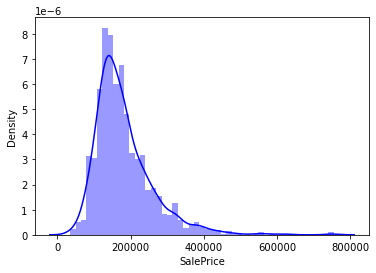

In [31]:
# Target columns
plt.figure()
sns.distplot(housedf['SalePrice'],color='b')
plt.show()

## outliers removal using IQR 

In [34]:
# IQR to remove the outlier
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
        '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] # one or more

Q1 = housedf[cols].quantile(0.05)
Q3 = housedf[cols].quantile(0.95)
IQR = Q3 - Q1

housedf = housedf[~((housedf[cols] < (Q1 - 1.5 * IQR)) |(housedf[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

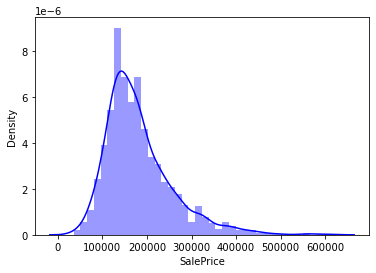

In [36]:
# Sale columns
plt.figure()
sns.distplot(housedf['SalePrice'],color='b')
plt.show()

In [37]:
housedf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1333 non-null   int64  
 1   MSZoning       1333 non-null   object 
 2   LotFrontage    1333 non-null   float64
 3   LotArea        1333 non-null   int64  
 4   Street         1333 non-null   object 
 5   LotShape       1333 non-null   object 
 6   LandContour    1333 non-null   object 
 7   Utilities      1333 non-null   object 
 8   LotConfig      1333 non-null   object 
 9   LandSlope      1333 non-null   object 
 10  Neighborhood   1333 non-null   object 
 11  Condition1     1333 non-null   object 
 12  Condition2     1333 non-null   object 
 13  BldgType       1333 non-null   object 
 14  HouseStyle     1333 non-null   object 
 15  OverallQual    1333 non-null   int64  
 16  OverallCond    1333 non-null   int64  
 17  YearBuilt      1333 non-null   int64  
 18  YearRemo

In [41]:
#### All numeric (float and int) variables in the dataset
data_numeric = housedf.select_dtypes(include=['float64', 'int64'])
data_numeric.head()



MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice
0          60         65.0     8450            7            5       2003          2003       196.0         706           0        150          856       856       854             0       1710             1             0         2         1             3             1             8           0       2003.0           2         548           0           61              0            0       2    2008     208500
1          20         80.0     9600            6            8       1976          1976         0.0         978           0        284         1262      1262         0             0       1262             0             1         2         0             3             1             6           1       1976.0           2         460         298            0              0            0       5    2007     181500
2          60         68.0    11250            7            5       2001          2002       162.0         486           0        434          920       920       866             0       1786             1             0         2         1             3             1             6           1       2001.0           2         608           0           42              0            0       9    2008     223500
3          70         60.0     9550            7            5       1915          1970         0.0         216           0        540          756       961       756             0       1717             1             0         1         0             3             1             7           1       1998.0           3         642           0           35            272            0       2    2006     140000
4          60         84.0    14260            8            5       2000          2000       350.0         655           0        490         1145      1145      1053             0       2198             1             0         2         1             4             1             9           1       2000.0           3         836         192           84              0            0      12    2008     250000

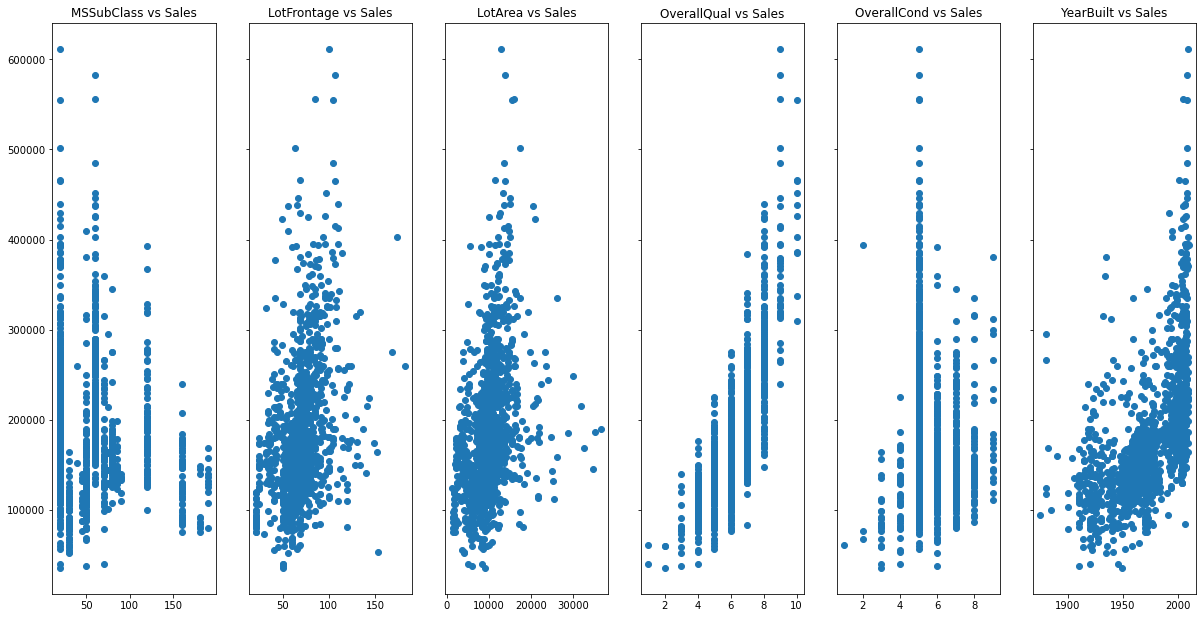

In [43]:
fig, ax = plt.subplots(ncols=6, sharey=True)

MSSubClass = ax[0].scatter(housedf['MSSubClass'], housedf['SalePrice'])
MSSubClass.set_label("MSSubClass")
ax[0].set_title('MSSubClass vs Sales')

LotFrontage= ax[1].scatter(housedf['LotFrontage'], housedf['SalePrice'])
LotFrontage.set_label("LotFrontage")
ax[1].set_title('LotFrontage vs Sales')

LotArea = ax[2].scatter(housedf['LotArea'], housedf['SalePrice'])
LotArea.set_label("LotArea")
ax[2].set_title('LotArea vs Sales')

OverallQual = ax[3].scatter(housedf['OverallQual'], housedf['SalePrice'])
OverallQual.set_label("LotArea")
ax[3].set_title('OverallQual vs Sales')

OverallCond = ax[4].scatter(housedf['OverallCond'], housedf['SalePrice'])
OverallCond.set_label("OverallCond")
ax[4].set_title('OverallCond vs Sales')

YearBuilt = ax[5].scatter(housedf['YearBuilt'], housedf['SalePrice'])
YearBuilt.set_label("YearBuilt")
ax[5].set_title('YearBuilt vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

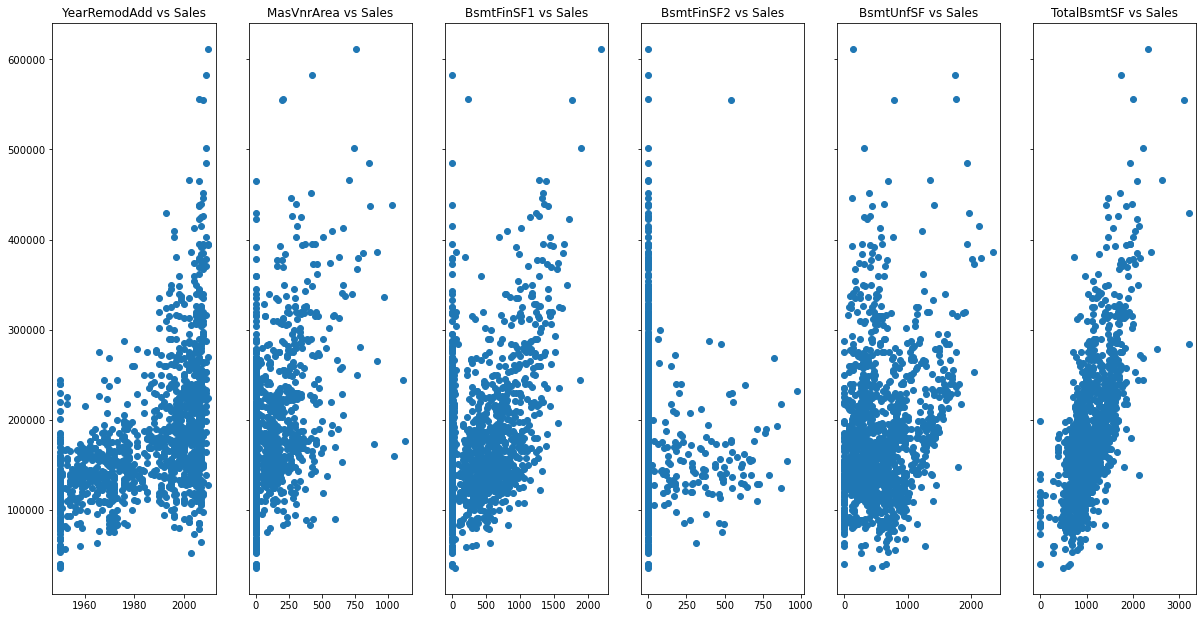

In [45]:
fig, ax = plt.subplots(ncols=6, sharey=True)

YearRemodAdd = ax[0].scatter(housedf['YearRemodAdd'], housedf['SalePrice'])
YearRemodAdd.set_label("YearRemodAdd")
ax[0].set_title('YearRemodAdd vs Sales')

MasVnrArea= ax[1].scatter(housedf['MasVnrArea'], housedf['SalePrice'])
MasVnrArea.set_label("MasVnrArea")
ax[1].set_title('MasVnrArea vs Sales')

BsmtFinSF1 = ax[2].scatter(housedf['BsmtFinSF1'], housedf['SalePrice'])
BsmtFinSF1.set_label("BsmtFinSF1")
ax[2].set_title('BsmtFinSF1 vs Sales')

BsmtFinSF2 = ax[3].scatter(housedf['BsmtFinSF2'], housedf['SalePrice'])
BsmtFinSF2.set_label("BsmtFinSF2")
ax[3].set_title('BsmtFinSF2 vs Sales')

BsmtUnfSF = ax[4].scatter(housedf['BsmtUnfSF'], housedf['SalePrice'])
BsmtUnfSF.set_label("BsmtUnfSF")
ax[4].set_title('BsmtUnfSF vs Sales')

TotalBsmtSF = ax[5].scatter(housedf['TotalBsmtSF'], housedf['SalePrice'])
TotalBsmtSF.set_label("TotalBsmtSF")
ax[5].set_title('TotalBsmtSF vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

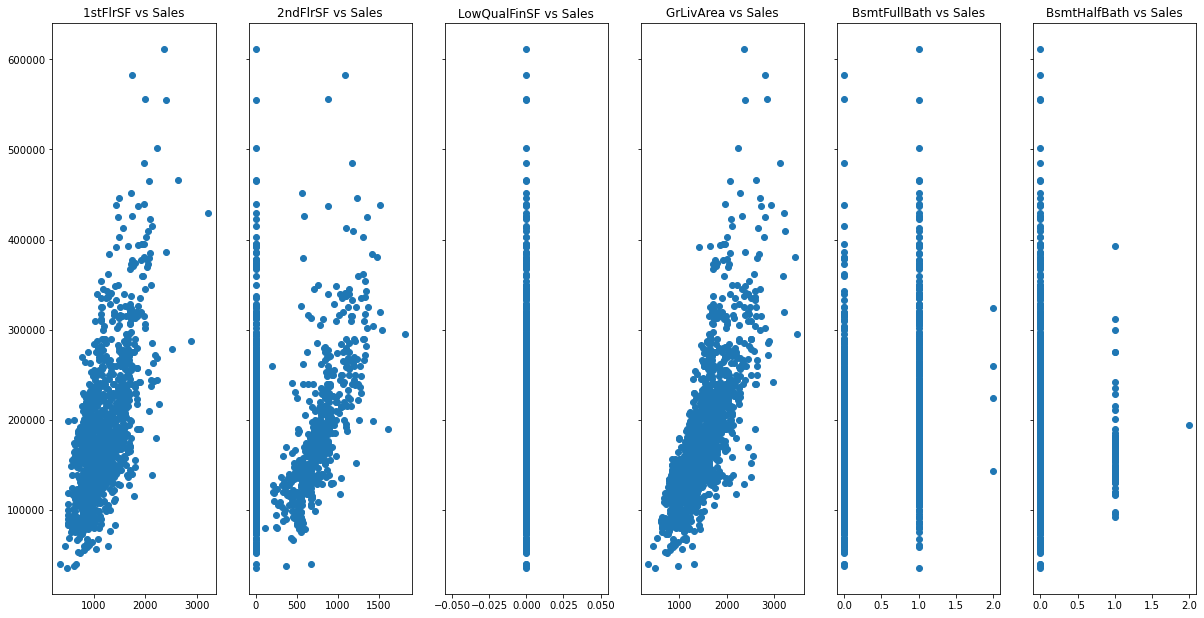

In [48]:
#['1stFlrSF', '2nhousedflrSF', 'LowQualFinSF', 'GrLivArea', 
#'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=6, sharey=True)

stFlrSF = ax[0].scatter(housedf['1stFlrSF'], housedf['SalePrice'])
stFlrSF.set_label("1stFlrSF")
ax[0].set_title('1stFlrSF vs Sales')

nhousedflrSF= ax[1].scatter(housedf['2ndFlrSF'], housedf['SalePrice'])
nhousedflrSF.set_label("2ndFlrSF")
ax[1].set_title('2ndFlrSF vs Sales')

LowQualFinSF = ax[2].scatter(housedf['LowQualFinSF'], housedf['SalePrice'])
LowQualFinSF.set_label("LowQualFinSF")
ax[2].set_title('LowQualFinSF vs Sales')

GrLivArea = ax[3].scatter(housedf['GrLivArea'], housedf['SalePrice'])
GrLivArea.set_label("GrLivArea")
ax[3].set_title('GrLivArea vs Sales')

BsmtFullBath = ax[4].scatter(housedf['BsmtFullBath'], housedf['SalePrice'])
BsmtFullBath.set_label("BsmtFullBath")
ax[4].set_title('BsmtFullBath vs Sales')

BsmtHalfBath = ax[5].scatter(housedf['BsmtHalfBath'], housedf['SalePrice'])
BsmtHalfBath.set_label("BsmtHalfBath")
ax[5].set_title('BsmtHalfBath vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

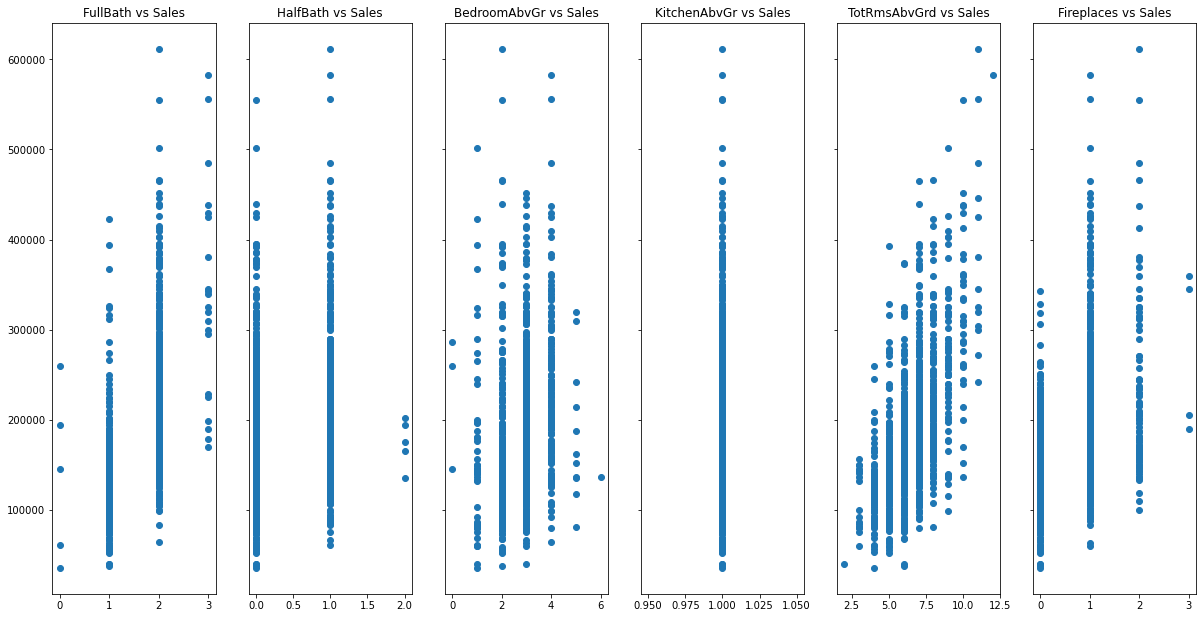

In [49]:
#['FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
#'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=6, sharey=True)

FullBath = ax[0].scatter(housedf['FullBath'], housedf['SalePrice'])
FullBath.set_label("FullBath")
ax[0].set_title('FullBath vs Sales')

HalfBath= ax[1].scatter(housedf['HalfBath'], housedf['SalePrice'])
HalfBath.set_label("HalfBath")
ax[1].set_title('HalfBath vs Sales')

BedroomAbvGr = ax[2].scatter(housedf['BedroomAbvGr'], housedf['SalePrice'])
BedroomAbvGr.set_label("BedroomAbvGr")
ax[2].set_title('BedroomAbvGr vs Sales')

KitchenAbvGr = ax[3].scatter(housedf['KitchenAbvGr'], housedf['SalePrice'])
KitchenAbvGr.set_label("KitchenAbvGr")
ax[3].set_title('KitchenAbvGr vs Sales')

TotRmsAbvGrd = ax[4].scatter(housedf['TotRmsAbvGrd'], housedf['SalePrice'])
TotRmsAbvGrd.set_label("TotRmsAbvGrd")
ax[4].set_title('TotRmsAbvGrd vs Sales')

Fireplaces = ax[5].scatter(housedf['Fireplaces'], housedf['SalePrice'])
Fireplaces.set_label("Fireplaces")
ax[5].set_title('Fireplaces vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

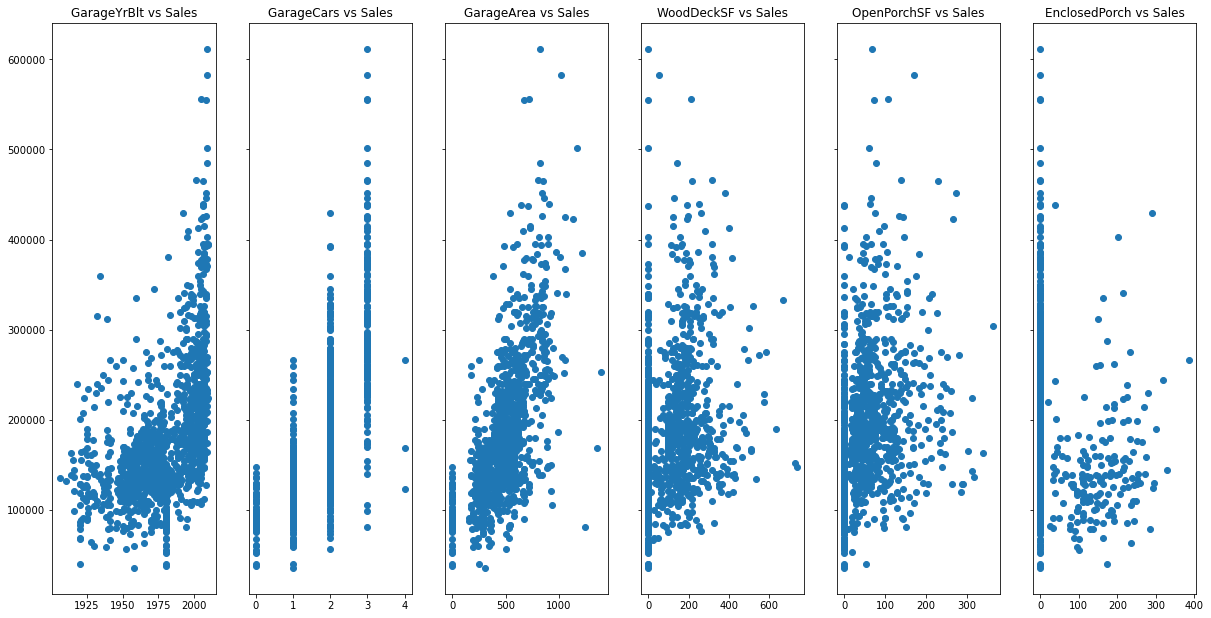

In [50]:
#[GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch',
#'MoSold', 'YrSold', 'SalePrice']
fig, ax = plt.subplots(ncols=6, sharey=True)

GarageYrBlt = ax[0].scatter(housedf['GarageYrBlt'], housedf['SalePrice'])
GarageYrBlt.set_label("GarageYrBlt")
ax[0].set_title('GarageYrBlt vs Sales')

GarageCars= ax[1].scatter(housedf['GarageCars'], housedf['SalePrice'])
GarageCars.set_label("GarageCars")
ax[1].set_title('GarageCars vs Sales')

GarageArea = ax[2].scatter(housedf['GarageArea'], housedf['SalePrice'])
GarageArea.set_label("GarageArea")
ax[2].set_title('GarageArea vs Sales')

WoodDeckSF = ax[3].scatter(housedf['WoodDeckSF'], housedf['SalePrice'])
WoodDeckSF.set_label("WoodDeckSF")
ax[3].set_title('WoodDeckSF vs Sales')

OpenPorchSF = ax[4].scatter(housedf['OpenPorchSF'], housedf['SalePrice'])
OpenPorchSF.set_label("OpenPorchSF")
ax[4].set_title('OpenPorchSF vs Sales')

EnclosedPorch = ax[5].scatter(housedf['EnclosedPorch'], housedf['SalePrice'])
EnclosedPorch.set_label("EnclosedPorch")
ax[5].set_title('EnclosedPorch vs Sales')


fig.set_size_inches(20.5, 10.5, forward=True)

plt.show()

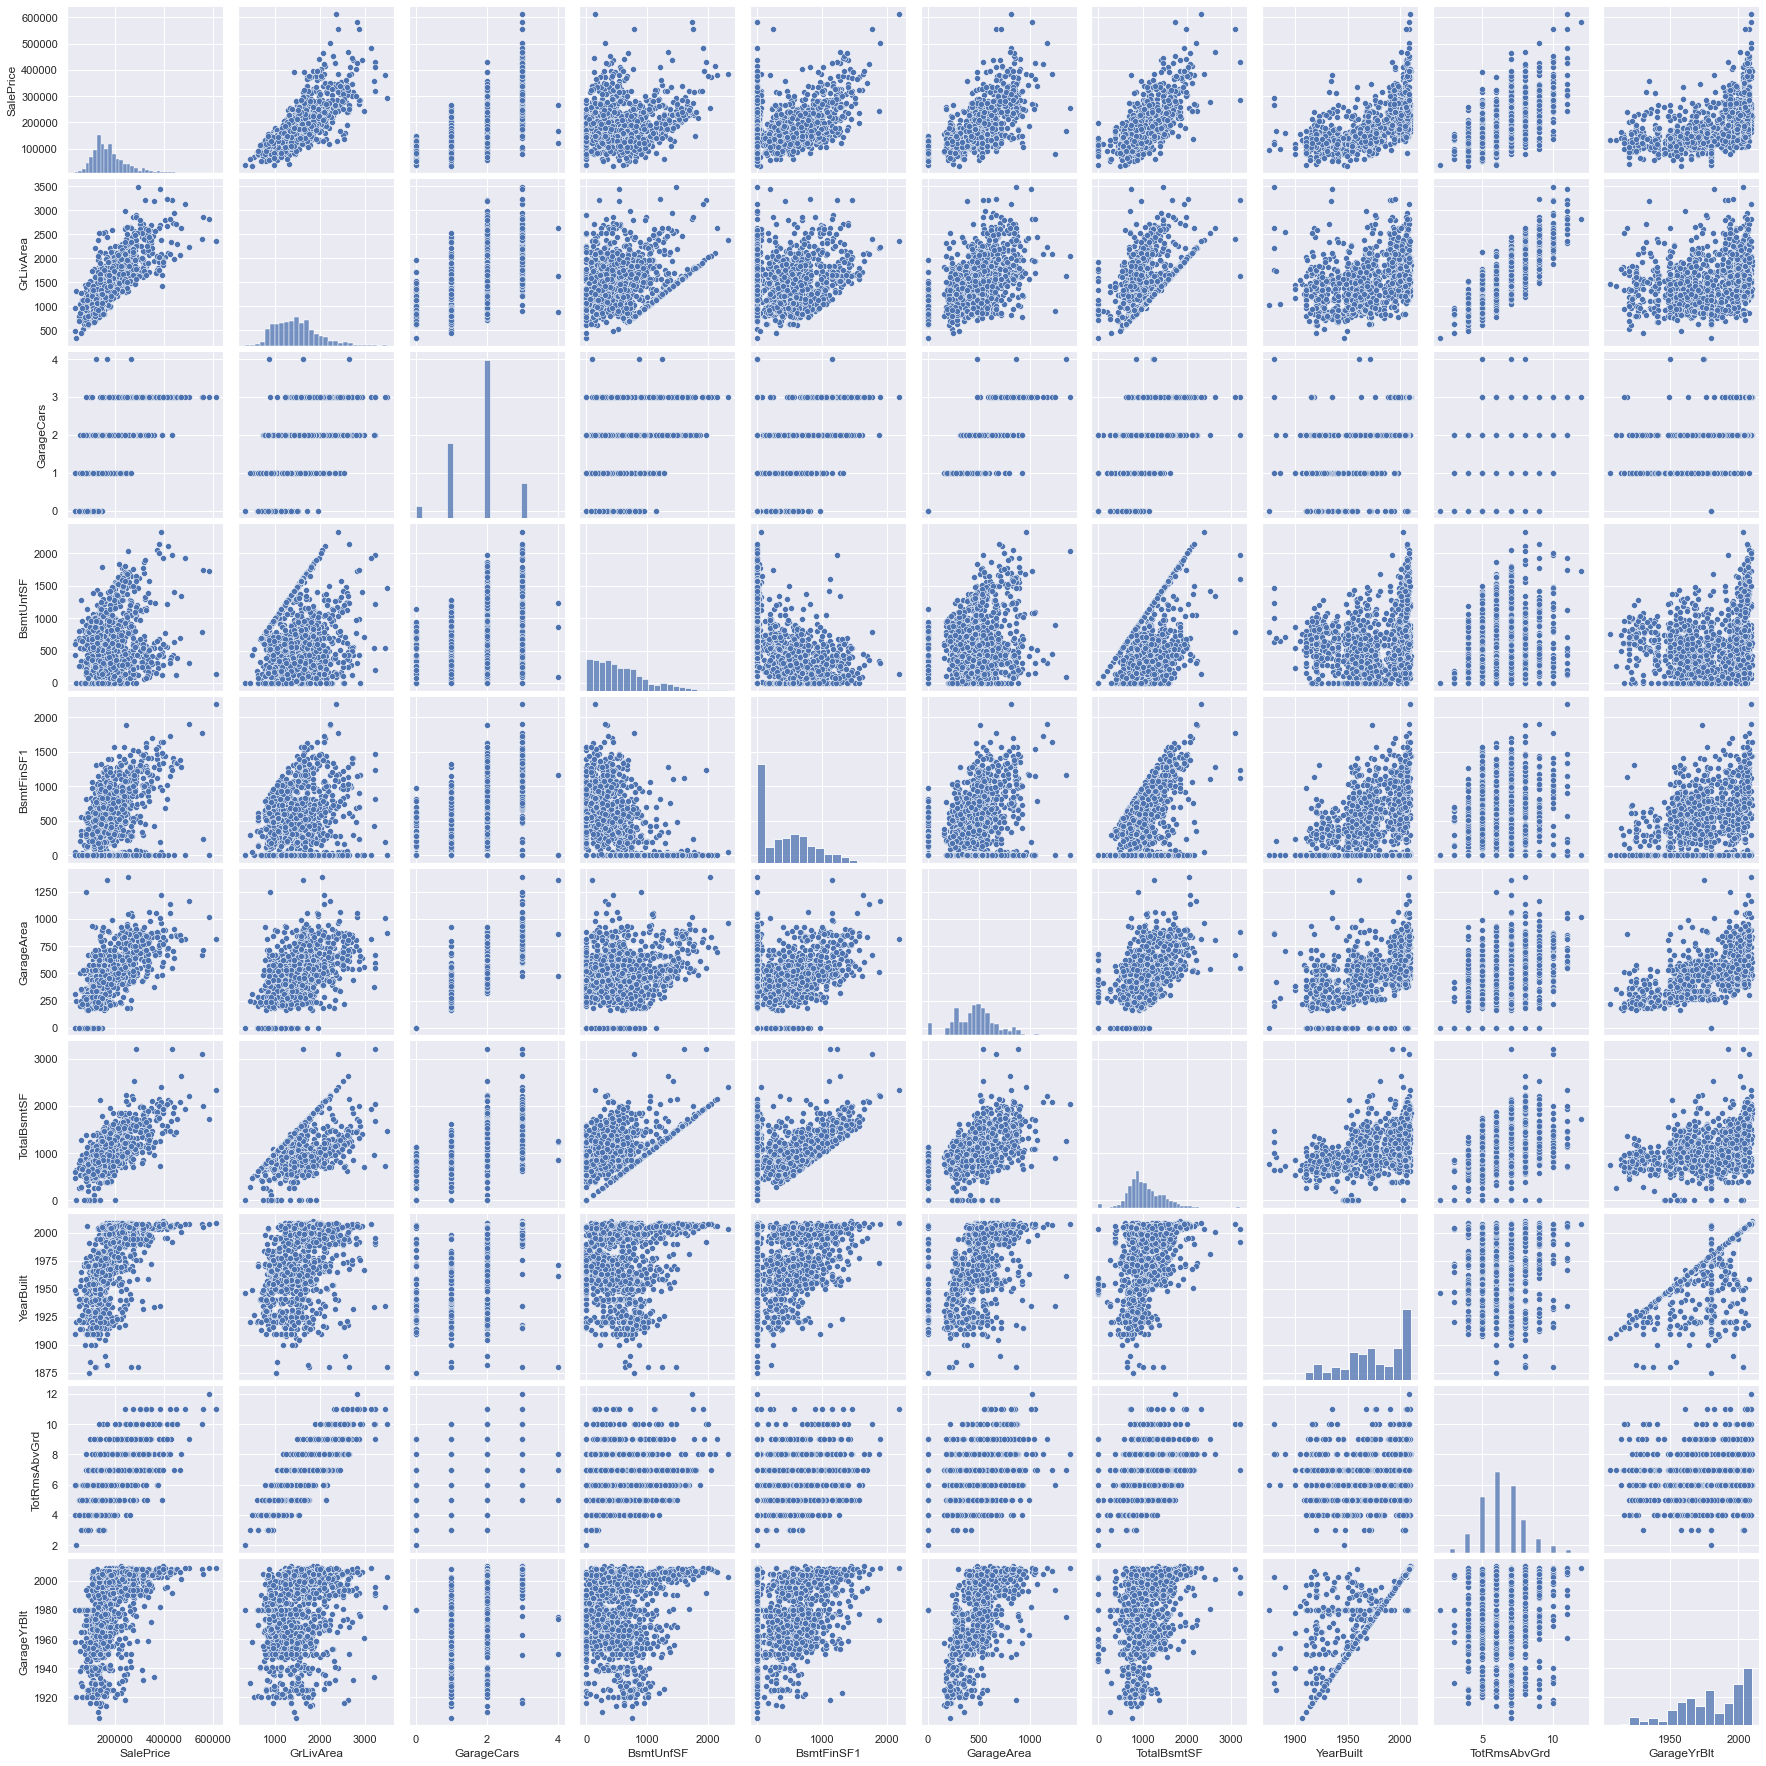

In [52]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(housedf[cols], size = 2.5)
plt.show()

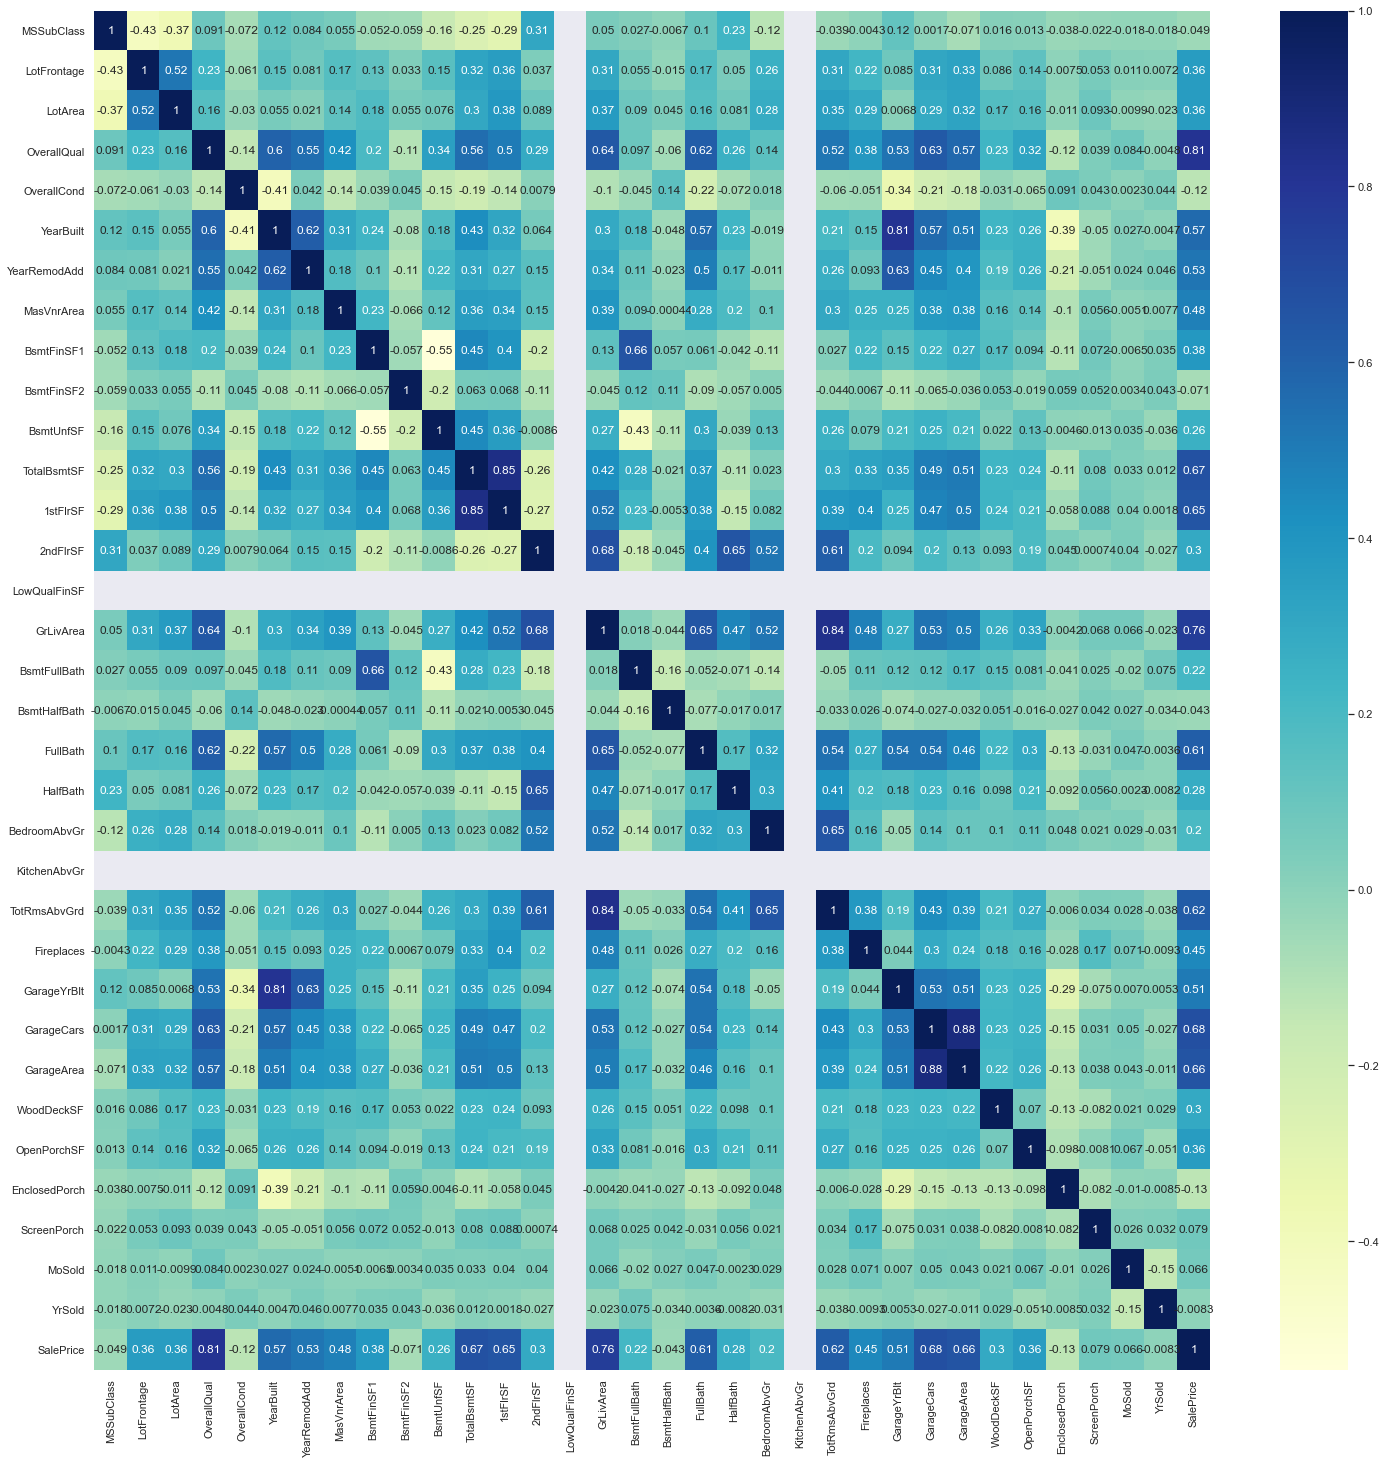

In [55]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25, 25))
sns.heatmap(housedf.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [56]:
housedf = housedf.drop(['GarageCars'], axis = 1)
housedf = housedf.drop(['BsmtUnfSF'], axis = 1)
housedf = housedf.drop(['TotRmsAbvGrd'], axis = 1)
housedf = housedf.drop(['GarageYrBlt'], axis = 1)    

housedf.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces GarageType GarageFinish  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold SaleType SaleCondition  SalePrice
0          60       RL         65.0     8450   Pave      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd        Typ           0     Attchd          RFn         548         TA         TA          Y           0           61              0            0       2    2008       WD        Normal     208500
1          20       RL         80.0     9600   Pave      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA        Typ           1     Attchd          RFn         460         TA         TA          Y         298            0              0            0       5    2007       WD        Normal     181500
2          60       RL         68.0    11250   Pave      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd        Typ           1     Attchd          RFn         608         TA         TA          Y           0           42              0            0       9    2008       WD        Normal     223500
3          70       RL         60.0     9550   Pave      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0          756    GasA        Gd          Y      SBrkr       961       756             0       1717             1             0         1         0             3             1          Gd        Typ           1     Detchd          Unf         642         TA         TA          Y           0           35            272            0       2    2006       WD       Abnorml     140000
4          60       RL         84.0    14260   Pave      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story      

In [58]:
housedf.shape

(1333, 68)

In [59]:
housedf.Street.value_counts()

Pave    1328
Grvl       5
Name: Street, dtype: int64

In [60]:
housedf.Utilities.value_counts()

AllPub    1332
NoSeWa       1
Name: Utilities, dtype: int64

In [61]:
# We can also drop columns that show very low variance and thus not required for predictions
housedf = housedf.drop(['Street'], axis = 1)
housedf = housedf.drop(['Utilities'], axis = 1)

In [62]:
housedf.shape

(1333, 66)

In [64]:
### Just to check the variance of these columns 

numer_cols= housedf.select_dtypes(include=['float64', 'int64'])
numer_cols

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice
0             60         65.0     8450            7            5       2003          2003       196.0         706           0          856       856       854             0       1710             1             0         2         1             3             1           0         548           0           61              0            0       2    2008     208500
1             20         80.0     9600            6            8       1976          1976         0.0         978           0         1262      1262         0             0       1262             0             1         2         0             3             1           1         460         298            0              0            0       5    2007     181500
2             60         68.0    11250            7            5       2001          2002       162.0         486           0          920       920       866             0       1786             1             0         2         1             3             1           1         608           0           42              0            0       9    2008     223500
3             70         60.0     9550            7            5       1915          1970         0.0         216           0          756       961       756             0       1717             1             0         1         0             3             1           1         642           0           35            272            0       2    2006     140000
4             60         84.0    14260            8            5       2000          2000       350.0         655           0         1145      1145      1053             0       2198             1             0         2         1             4             1           1         836         192           84              0            0      12    2008     250000
...          ...          ...      ...          ...          ...        ...           ...         ...         ...         ...          ...       ...       ...           ...        ...           ...           ...       ...       ...           ...           ...         ...         ...         ...          ...            ...          ...     ...     ...        ...
1454          20         62.0     7500            7            5       2004          2005         0.0         410           0         1221      1221         0             0       1221             1             0         2         0             2             1           0         400           0          113              0            0      10    2009     185000
1455          60         62.0     7917            6            5       1999          2000         0.0           0           0          953       953       694             0       1647             0             0         2         1             3             1           1         460           0           40              0            0       8    2007     175000
1456          20         85.0    13175            6            6       1978          1988       119.0         790         163         1542      2073         0             0       2073             1             0         2         0             3             1           2         500         349            0              0            0       2    2010     210000
1457          70         66.0     9042            7            9       1941          2006         0.0         275           0         1152      1188      1152             0       2340             0             0         2         0             4             1           2         252           0           60              0            0       5    2010     266500
14

In [65]:
for i in numer_cols:
    print(housedf[i].value_counts())

20     522
60     286
50     130
120     85
30      67
160     60
80      58
70      56
85      20
45      12
190     11
180     10
75       8
90       6
40       2
Name: MSSubClass, dtype: int64
69.0     252
60.0     117
80.0      66
70.0      66
50.0      52
75.0      49
65.0      42
85.0      38
21.0      23
78.0      23
90.0      21
24.0      18
73.0      17
63.0      16
68.0      16
55.0      16
72.0      15
100.0     15
79.0      15
74.0      14
66.0      14
64.0      14
51.0      13
59.0      13
71.0      12
40.0      12
43.0      12
57.0      12
52.0      11
67.0      11
88.0      10
76.0      10
53.0      10
34.0      10
84.0       9
77.0       9
44.0       9
82.0       9
86.0       9
96.0       8
61.0       8
92.0       8
93.0       8
35.0       8
62.0       7
120.0      7
98.0       7
58.0       7
36.0       6
95.0       6
48.0       6
89.0       6
41.0       6
110.0      6
81.0       6
54.0       6
107.0      6
94.0       5
56.0       5
37.0       5
32.0       5
91.0       

## Dummy Variable

In [70]:
#Categorical columns
housedf.select_dtypes(include='object').columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'], dtype='object')

In [72]:
# Convert categorical value into Dummy variable
housedf=pd.get_dummies(housedf,drop_first=True)
housedf.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0          60         65.0     8450            7            5       2003          2003       196.0         706           0          856       856       854             0       1710             1             0         2         1             3             1           0         548           0           61              0            0       2    2008     208500            0            0            1            0             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
1          20         80.0     9600            6            8       1976          1976         0.0         978           0         1262      1262         0             0       1262             0             1         2         0             3             1           1         460         298            0              0            0       5    2007     181500            0            0            1            0             0             0             1                0                0                1                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
2          60         68.0    11250            7            5       2001          2002       162.0         486           0          920       920       866             0       1786             1             0         2         1             3             1           1         608           0           42              0            0       9    2008     223500            0            0            1            0             0             0             0                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
3          70         6

In [74]:
housedf.shape

(1333, 216)

## Splitting the data into train and test sets

In [75]:
#Split the data into train and test
y = housedf.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [76]:
X = housedf
X.shape

(1333, 215)

In [77]:
#import train_test_split to split the data
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
1108          60         69.0     8063            6            5       2000          2000         0.0           0           0          924       948       742             0       1690             0             0         2         1             3             1           1         463         100           48              0            0      11    2007            0            0            1            0             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
745           60         69.0     8963            8            9       1976          1996       289.0         575          80         1142      1175      1540             0       2715             0             1         3         1             4             1           2         831           0          204              0            0       7    2008            0            0            1            0             0             0             0                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    1                     0                     0                     0                   0   
1134          60         57.0     8773            6            5       1997          1997         0.0           0           0          916       916       684             0       1600             0             0         2         1             3             1           1         460         100           38              0            0       8    2007            0            0            1            0             0             0             0                1                0                0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
512           20         70.0     9100            5       

In [81]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (893, 215)
X_test shape (440, 215)
y_train shape (893,)
y_test shape (440,)


## Scaling of numeric varaibles

In [82]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
1108          60         69.0     8063            6            5       2000          2000         0.0           0           0          924       948       742             0       1690             0             0         2         1             3             1           1         463         100           48              0            0      11    2007            0            0            1            0             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
745           60         69.0     8963            8            9       1976          1996       289.0         575          80         1142      1175      1540             0       2715             0             1         3         1             4             1           2         831           0          204              0            0       7    2008            0            0            1            0             0             0             0                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    1                     0                     0                     0                   0   
1134          60         57.0     8773            6            5       1997          1997         0.0           0           0          916       916       684             0       1600             0             0         2         1             3             1           1         460         100           38              0            0       8    2007            0            0            1            0             0             0             0                1                0                0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
512           20         70.0     9100            5       

In [83]:
y_train.head()

1108    181000
745     299800
1134    169000
512     129900
43      130250
Name: SalePrice, dtype: int64

In [84]:
X_test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
990           60         82.0     9452            8            5       1997          1998       423.0        1074           0         1396      1407       985             0       2392             1             0         2         1             3             1           1         870           0           70              0            0       6    2006            0            0            1            0             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     1                     0                     0                   0   
1161          20         69.0    14778            6            7       1954          2006        72.0         728           0         1296      1640         0             0       1640             1             0         1         0             3             1           1         924         108            0              0            0      11    2008            0            0            1            0             0             0             0                0                1                0                  1              0              0                 0              0              0                     0                    0                     0                     0                     0                     1                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
1369          20         48.0    10635            8            5       2003          2003       171.0         370         972         1657      1668         0             0       1668             1             0         2         0             3             1           1         502           0          262              0            0       5    2010            0            0            1            0             1             0             0                0                0                1                  0              1              0                 0              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
329           70         60.0     6402            5       

In [85]:
# columns to be scaled
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'], dtype='object')

In [87]:
#num_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
  #     'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
  #     'GrLivArea', 'BedroomAbvGr', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
  #     'EnclosedPorch', 'ScreenPorch']


num_vars= ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold']
X_train[num_vars].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold
1108          60         69.0     8063            6            5       2000          2000         0.0           0           0          924       948       742             0       1690             0             0         2         1             3             1           1         463         100           48              0            0      11    2007
745           60         69.0     8963            8            9       1976          1996       289.0         575          80         1142      1175      1540             0       2715             0             1         3         1             4             1           2         831           0          204              0            0       7    2008
1134          60         57.0     8773            6            5       1997          1997         0.0           0           0          916       916       684             0       1600             0             0         2         1             3             1           1         460         100           38              0            0       8    2007
512           20         70.0     9100            5            5       1958          1958         0.0         521         174          864       864         0             0        864             1             0         1         0             3             1           0         624           0            0              0            0       7    2006
43            20         69.0     9200            5            6       1975          1980         0.0         280         491          938       938         0             0        938             1             0         1         0             3             1           0         308         145            0              0            0       7    2008

In [88]:
#Scaling using MinMax
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#scaler = StandardScaler()
scaler=MinMaxScaler()

In [89]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [90]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
1108    0.235294     0.298137  0.187723     0.555556        0.500   0.932836      0.833333    0.000000    0.000000    0.000000     0.288210  0.170306  0.460583           0.0   0.407819           0.0           0.0  0.666667       0.5      0.500000           0.0    0.333333    0.333094    0.135870     0.131868            0.0          0.0  0.909091    0.25            0            0            1            0             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
745     0.235294     0.298137  0.213431     0.777778        1.000   0.753731      0.766667    0.255979    0.262797    0.088300     0.356207  0.252911  0.955928           0.0   0.753286           0.0           0.5  1.000000       0.5      0.666667           0.0    0.666667    0.597842    0.000000     0.560440            0.0          0.0  0.545455    0.50            0            0            1            0             0             0             0                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    1                     0                     0                     0                   0   
1134    0.235294     0.223602  0.208004     0.555556        0.500   0.910448      0.783333    0.000000    0.000000    0.000000     0.285714  0.158661  0.424581           0.0   0.377486           0.0           0.0  0.666667       0.5      0.500000           0.0    0.333333    0.330935    0.135870     0.104396            0.0          0.0  0.636364    0.25            0            0            1            0             0             0             0                1                0                0                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     1                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
512     0.000000     0.304348  0.217344     0.

In [91]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch    MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
990     0.235294     0.378882  0.227399     0.777778         0.50   0.910448      0.800000    0.374668    0.490859    0.000000     0.435434  0.337336  0.611421           0.0   0.644422           0.5           0.0  0.666667       0.5           0.5           0.0    0.333333    0.625899    0.000000     0.192308       0.000000          0.0  0.454545    0.00            0            0            1            0             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     1                     0                     0                   0   
1161    0.000000     0.298137  0.379531     0.555556         0.75   0.589552      0.933333    0.063773    0.332724    0.000000     0.404242  0.422125  0.000000           0.0   0.390967           0.5           0.0  0.333333       0.0           0.5           0.0    0.333333    0.664748    0.146739     0.000000       0.000000          0.0  0.909091    0.50            0            0            1            0             0             0             0                0                1                0                  1              0              0                 0              0              0                     0                    0                     0                     0                     0                     1                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
1369    0.000000     0.167702  0.261190     0.777778         0.50   0.955224      0.883333    0.151461    0.169104    1.072848     0.516843  0.432314  0.000000           0.0   0.400404           0.5           0.0  0.666667       0.0           0.5           0.0    0.333333    0.361151    0.000000     0.719780       0.000000          0.0  0.363636    1.00            0            0            1            0             1             0             0                0                0                1                  0              1              0                 0              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0   
329     0.294118     0.242236  0.140278     0.

## Model Building and Evaluation
### we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE

In [92]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [93]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [94]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 47),
 ('LotFrontage', False, 26),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 99),
 ('MasVnrArea', False, 61),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 154),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 22),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 177),
 ('BsmtHalfBath', False, 81),
 ('FullBath', False, 136),
 ('HalfBath', False, 162),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 25),
 ('Fireplaces', False, 168),
 ('GarageArea', False, 2),
 ('WoodDeckSF', False, 85),
 ('OpenPorchSF', False, 80),
 ('EnclosedPorch', False, 131),
 ('ScreenPorch', False, 68),
 ('MoSold', False, 187),
 ('YrSold', False, 158),
 ('MSZoning_FV', False, 41),
 ('MSZoning_RH', False, 40),
 ('MSZoning_RL', False, 42),
 ('MSZoning_RM', False, 43),
 ('LotShape_IR2', False, 180),
 ('LotShape_IR3', False, 113),
 ('LotShape_Reg', False

In [95]:
# Extract the top features
col = X_train.columns[rfe.support_]
col


Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'LandSlope_Sev', 'Condition2_PosN', 'RoofStyle_Shed', 'RoofMatl_Metal', 'RoofMatl_WdShake', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtCond_Po', 'Heating_OthW', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'SaleType_Con'], dtype='object')

In [97]:
# Extract the non-important features
X_train.columns[~rfe.support_]


Index(['MSSubClass', 'LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=190)

In [104]:
#Check the shape of train and test
X_train1=X_train[col]
X_test1=X_test[col]
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(893, 25)
(440, 25)
(893,)
(440,)


In [105]:
lm1=lm.fit(X_train, y_train)

In [106]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

-1.3028862816320531e+17
[-2.19069665e+04  1.76426064e+04  3.66168136e+04  6.59974326e+04
  5.21083532e+04  3.96757618e+04 -6.99209199e+02  1.62790914e+04
  5.75433862e+04 -8.89635449e+03  8.24273252e+04 -6.71353017e+17
 -3.93577042e+17 -6.66004335e+16  7.24856041e+17  1.37722705e+03
 -2.52759770e+03  1.55447234e+04  4.24025775e+03 -2.76429749e+04
  1.72542196e+15 -2.86013235e+02  1.27592898e+04  1.89333436e+04
  1.28883198e+04  5.97692980e+03  1.84220343e+04  5.74537993e+01
 -2.79521614e+03  4.78189736e+04  4.29220326e+04  3.38405221e+04
  2.11207181e+04  8.17863873e+03 -1.72345273e+04  4.17784017e+03
  1.99334744e+04 -1.32153914e+04  7.98664666e+03  1.06245287e+04
 -8.92646091e+03 -1.69194084e+04 -2.11552320e+03 -5.81090546e+02
 -6.45598041e+04 -3.50038684e+03  2.87813375e+03 -1.29931027e+04
 -2.29015502e+04 -1.35047574e+04  9.57185345e+03 -2.11284320e+04
 -1.02124440e+04 -1.43840549e+04 -5.10734227e+03 -2.03512097e+04
 -2.49431090e+04 -6.85644219e+03 -2.91155057e+04 -2.61761255e+03
 

In [107]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

In [108]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8916372478767097
0.8719204839794825
547808207403.29297
318708119193.7977
613447040.7651657
724336634.5313585


# Ridge and Lasso Regression

In [109]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [110]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train1, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 2.0}
-17654.75216848438


## Optimim value of alpha is 2.0

In [112]:
alpha = 2
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([ 53791.88251635,  97854.73342702,  33770.40855679,  55544.30726307,
        46524.58678933,  69184.68060109,  83145.78376704,  44815.93238352,
       101342.46068813, -24666.5755911 , -20478.50229919,  -9888.3725586 ,
        11873.38738506,  10967.33782808, -14073.86444015, -38809.52044954,
       -41005.2895042 , -52621.4348957 ,  10247.05842635, -13071.3795498 ,
       -38450.51656941, -35779.92792432, -39513.84059337, -16118.52967462,
        20216.87624895])

In [113]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8878800254981487
0.8776117092918109
566802162574.0997
304546294012.4021
634716867.3842102
692150668.2100048


# Lasso 

In [114]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [115]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 20}
-17811.29754956044


# The optimum value of alpha is 20

In [116]:
alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

Lasso(alpha=20)

In [117]:
lasso.coef_

array([ 58050.87191642, 105054.93841894,  38341.17434304,  56923.90142111,
        44021.91355745,  70083.38926802,   9295.4432157 ,      0.        ,
       195344.05320506, -38115.4741636 , -32939.63458389, -20709.0809933 ,
        34601.07152898,  23446.75334022, -24872.82069365, -52810.2842083 ,
       -45615.8393866 , -54919.81195042,  42292.09828617, -23873.4606934 ,
       -37008.21694923, -34435.22614474, -36730.72497179, -33339.89049064,
        29229.78691877])

In [118]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8906766176821155
0.8757681026689755
552664498837.0823
309133853503.20276
618885217.0628021
702576939.7800063


In [119]:
metric2

[0.8878800254981487,
 0.8776117092918109,
 566802162574.0997,
 304546294012.4021,
 25193.587822781617,
 26308.75649303868]

In [120]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.916372e-01      8.878800e-01      8.906766e-01
1   R2 Score (Test)       8.719205e-01      8.776117e-01      8.757681e-01
2       RSS (Train)       5.478082e+11      5.668022e+11      5.526645e+11
3        RSS (Test)       3.187081e+11      3.045463e+11      3.091339e+11
4       MSE (Train)       2.476786e+04      2.519359e+04      2.487740e+04
5        MSE (Test)       2.691350e+04      2.630876e+04      2.650617e+04

# Model Evaluation
The r2_score of ridge is slightly higher than lasso for the test dataset

In [121]:
ridge_pred = ridge.predict(X_test1)

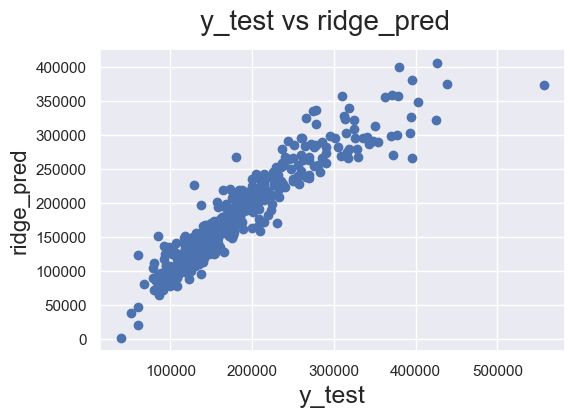

In [122]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

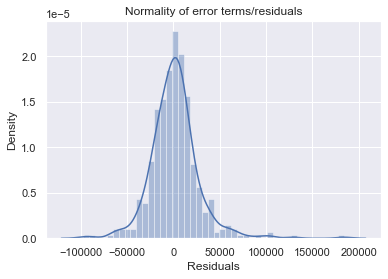

In [123]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [124]:
lasso_pred = lasso.predict(X_test1)

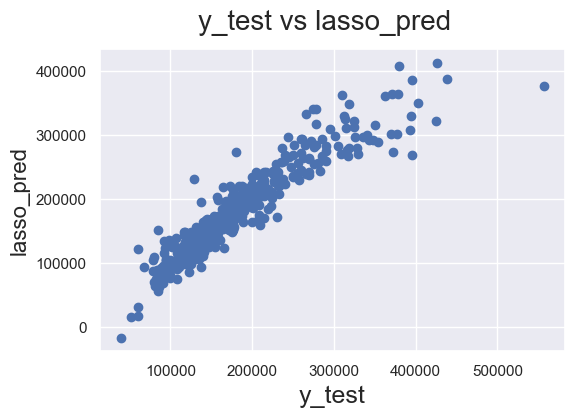

In [125]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

# Lets observe the changes in the coefficients after regularization

In [126]:
betas = pd.DataFrame(index=X_train1.columns)

In [127]:
betas.rows = X_train1.columns

In [128]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [129]:
pd.set_option('display.max_rows', None)
betas.head(68)


Ridge          Lasso
LotArea            53791.882516   58050.871916
OverallQual        97854.733427  105054.938419
OverallCond        33770.408557   38341.174343
YearBuilt          55544.307263   56923.901421
BsmtFinSF1         46524.586789   44021.913557
TotalBsmtSF        69184.680601   70083.389268
1stFlrSF           83145.783767    9295.443216
2ndFlrSF           44815.932384       0.000000
GrLivArea         101342.460688  195344.053205
BedroomAbvGr      -24666.575591  -38115.474164
LandSlope_Sev     -20478.502299  -32939.634584
Condition2_PosN    -9888.372559  -20709.080993
RoofStyle_Shed     11873.387385   34601.071529
RoofMatl_Metal     10967.337828   23446.753340
RoofMatl_WdShake  -14073.864440  -24872.820694
ExterQual_Fa      -38809.520450  -52810.284208
ExterQual_Gd      -41005.289504  -45615.839387
ExterQual_TA      -52621.434896  -54919.811950
BsmtCond_Po        10247.058426   42292.098286
Heating_OthW      -13071.379550  -23873.460693
KitchenQual_Fa    -38450.516569  -37008.216949
KitchenQual_Gd    -35779.927924  -34435.226145
KitchenQual_TA    -39513.840593  -36730.724972
Functional_Maj2   -16118.529675  -33339.890491
SaleType_Con       20216.876249   29229.786919

# Q1-Which variables are significant in predicting the price of a house?

Answer- The below mentioned variables are significant in predicting the price

- LotArea------------- Lot size in square feet
- OverallQual--------Rates the overall material and finish of the house
- OverallCond-------Rates the overall condition of the house
- YearBuilt-------- ---Original construction date
- BsmtFinSF1-------Type 1 finished square feet
- TotalBsmtSF------Total square feet of basement area
- GrLivArea----------Above grade (ground) living area square feet
- TotRmsAbvGrd---Total rooms above grade (does not include bathrooms)
- Street_Pave-------Pave road access to property
- RoofMatl_Metal--Roof material_Metal


#  Q2 -How well those variables describe the price of a house

Answer-

               Ridge Regression  Lasso Regression

R2 score(Train)---------        0.88    ----------------------------0.89

R2 score(Test)-----------0.87-----------------------------0.87

In [131]:
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       8.916372e-01      8.878800e-01      8.906766e-01
1   R2 Score (Test)       8.719205e-01      8.776117e-01      8.757681e-01
2       RSS (Train)       5.478082e+11      5.668022e+11      5.526645e+11
3        RSS (Test)       3.187081e+11      3.045463e+11      3.091339e+11
4       MSE (Train)       2.476786e+04      2.519359e+04      2.487740e+04
5        MSE (Test)       2.691350e+04      2.630876e+04      2.650617e+04

In [132]:
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge          Lasso
LotArea            53791.882516   58050.871916
OverallQual        97854.733427  105054.938419
OverallCond        33770.408557   38341.174343
YearBuilt          55544.307263   56923.901421
BsmtFinSF1         46524.586789   44021.913557
TotalBsmtSF        69184.680601   70083.389268
1stFlrSF           83145.783767    9295.443216
2ndFlrSF           44815.932384       0.000000
GrLivArea         101342.460688  195344.053205
BedroomAbvGr      -24666.575591  -38115.474164
LandSlope_Sev     -20478.502299  -32939.634584
Condition2_PosN    -9888.372559  -20709.080993
RoofStyle_Shed     11873.387385   34601.071529
RoofMatl_Metal     10967.337828   23446.753340
RoofMatl_WdShake  -14073.864440  -24872.820694
ExterQual_Fa      -38809.520450  -52810.284208
ExterQual_Gd      -41005.289504  -45615.839387
ExterQual_TA      -52621.434896  -54919.811950
BsmtCond_Po        10247.058426   42292.098286
Heating_OthW      -13071.379550  -23873.460693
KitchenQual_Fa    -38450.516569  -37008.216949
KitchenQual_Gd    -35779.927924  -34435.226145
KitchenQual_TA    -39513.840593  -36730.724972
Functional_Maj2   -16118.529675  -33339.890491
SaleType_Con       20216.876249   29229.786919

# Problem Statement -Part 2

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#  Answer

 1. The optimal value of alpha for ridge and lasso regression

    Ridge Alpha 2

    lasso Alpha 20

Ridge Regression

In [136]:
#Change the alpha value from 2 to 4
alpha = 4
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train1, y_train)

Ridge(alpha=4)

In [137]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train1)
y_pred_test = ridge2.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8840201023484701
0.8763670118000035
586315302835.9323
307643551160.9661
656568088.282119
699189889.0021957


## if you see slight decrease in r2 scroes for both train and test with metrics which we calcauted before  
### train is 0.8840201023484701 before 0.8878800
### test is 0.8763670118000035 before  0.8776117

# Lasso 

In [143]:
#Changed alpha 20 to 40
alpha =40
lasso40 = Lasso(alpha=alpha)
lasso40.fit(X_train1, y_train) 

Lasso(alpha=40)

In [144]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso40.predict(X_train1)
y_pred_test = lasso40.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

#R2score at alpha-20
#0.89067
#0.8757681

0.8885143427403547
0.8775918827343511
563595486990.7546
304595629651.96765
631125965.2752012
692262794.6635629


### if you see slight decrease in r2 scroes for  train and slight increase in test with metrics which we calcauted before also mse got increased alot
### r2 in train is 0.8885143 , before 0.89067
### r2 in train is 0.8775918, before 0.8757681

- LotArea---------------Lot size in square feet
- OverallQual---------Rates the overall material and finish of the house
- OverallCond--------Rates the overall condition of the house
- YearBuilt-------------Original construction date
- BsmtFinSF1--------Type 1 finished square feet
- TotalBsmtSF------- Total square feet of basement area
- GrLivArea-----------Above grade (ground) living area square feet
- TotRmsAbvGrd----Total rooms above grade (does not include bathrooms)
- Street_Pave--------Pave road access to property
- RoofMatl_Metal----Roof material_Metal



Predictors are same but the coefficent of these predictor has changed

# Question 2
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why? 
Question 2 You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Answer:
        
The r2_score of ridge is slightly higher than lasso for the test dataset so we will choose ridge regression to solve this problem

# Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [145]:

X_train1

LotArea  OverallQual  OverallCond  YearBuilt  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BedroomAbvGr  LandSlope_Sev  Condition2_PosN  RoofStyle_Shed  RoofMatl_Metal  RoofMatl_WdShake  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  BsmtCond_Po  Heating_OthW  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  Functional_Maj2  SaleType_Con
1108  0.187723     0.555556        0.500   0.932836    0.000000     0.288210  0.170306  0.460583   0.407819      0.500000              0                0               0               0                 0             0             0             1            0             0               0               0               1                0             0
745   0.213431     0.777778        1.000   0.753731    0.262797     0.356207  0.252911  0.955928   0.753286      0.666667              0                0               0               0                 0             0             0             0            0             0               0               1               0                0             0
1134  0.208004     0.555556        0.500   0.910448    0.000000     0.285714  0.158661  0.424581   0.377486      0.500000              0                0               0               0                 0             0             0             1            0             0               0               0               1                0             0
512   0.217344     0.444444        0.500   0.619403    0.238117     0.269495  0.139738  0.000000   0.129424      0.500000              0                0               0               0                 0             0             0             1            0             0               0               0               1                0             0
43    0.220201     0.444444        0.625   0.746269    0.127971     0.292576  0.166667  0.000000   0.154365      0.500000              0                0               0               0                 0             0             0             1            0             0               0               0               1                0             0
33    0.258819     0.444444        0.500   0.626866    0.465265     0.436057  0.443959  0.000000   0.411190      0.666667              0                0               0               0                 0             0             0             1            0             0               0               1               0                0             0
269   0.183553     0.555556        0.750   0.753731    0.343236     0.356519  0.230349  0.000000   0.213347      0.500000              0                0               0               0                 0             0             0             1            0             0               0               0               1                0             0
789   0.306036     0.555556        0.875   0.679104    0.259598     0.259513  0.180495  0.689634   0.541625      0.833333              0                0               0               0                 0             0             0             1            0             0               0               1               0                0             0
1038  0.001200     0.333333        0.625   0.708955    0.000000     0.170306  0.115721  0.338920   0.291203      0.500000              0                0               0               0                 0             0             0             1            0             0               0               0               1                0             0
151   0.354195     0.777778        0.500   0.985075    0.639854     0.533375  0.447598  0.000000   0.414560      0.333333              0                0               0               0                 0             0             1             0            0             0               0               1               0                0             0
344   0.031449     0.444444        0.250   0.753731    0.058958     0.167187  0.020378  0.357542   0.213010      0.500000              

In [146]:
y_train

1108    181000
745     299800
1134    169000
512     129900
43      130250
33      165500
269     148000
789     187500
1038     97000
151     372402
344      85000
1218     80500
1040    155000
688     392000
1289    281000
1459    147500
1448    112000
733     131400
3       140000
123     153900
812      55993
1258    190000
929     222000
1348    215000
692     335000
1014    119200
412     222000
1425    142000
497     184000
603     151000
348     154000
481     374000
484     132500
1184    186700
353     105900
1415    175900
1000     82000
5       143000
112     383970
465     178740
859     250000
687     148800
1254    165400
783     165500
464     124000
1102    135000
1192    125000
677     109500
1193    165000
841     157500
252     173000
622     135000
711     102776
861     131500
604     221000
73      144900
926     285000
75       91000
1327    130500
234     216500
14      157000
686     227875
882     178000
331     139000
624     165150
578     146000
1033    23

In [147]:
X_train1.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'LandSlope_Sev', 'Condition2_PosN', 'RoofStyle_Shed', 'RoofMatl_Metal', 'RoofMatl_WdShake', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'BsmtCond_Po', 'Heating_OthW', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Maj2', 'SaleType_Con'], dtype='object')

LotArea,OverallQual,YearBuilt,BsmtFinSF1,TotalBsmtSF are the top 5 important predictors.

Let's drop these columns 

In [158]:
X_train2 = X_train1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)
X_test2 = X_test1.drop(['LotArea','OverallQual','YearBuilt','BsmtFinSF1','TotalBsmtSF'],axis=1)

In [159]:
X_train2.head()

OverallCond  1stFlrSF  2ndFlrSF  GrLivArea  BedroomAbvGr  LandSlope_Sev  Condition2_PosN  RoofStyle_Shed  RoofMatl_Metal  RoofMatl_WdShake  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  BsmtCond_Po  Heating_OthW  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  Functional_Maj2  SaleType_Con
1108        0.500  0.170306  0.460583   0.407819      0.500000              0                0               0               0                 0             0             0             1            0             0               0               0               1                0             0
745         1.000  0.252911  0.955928   0.753286      0.666667              0                0               0               0                 0             0             0             0            0             0               0               1               0                0             0
1134        0.500  0.158661  0.424581   0.377486      0.500000              0                0               0               0                 0             0             0             1            0             0               0               0               1                0             0
512         0.500  0.139738  0.000000   0.129424      0.500000              0                0               0               0                 0             0             0             1            0             0               0               0               1                0             0
43          0.625  0.166667  0.000000   0.154365      0.500000              0                0               0               0                 0             0             0             1            0             0               0               0               1                0             0

In [160]:
X_test2.head()

OverallCond  1stFlrSF  2ndFlrSF  GrLivArea  BedroomAbvGr  LandSlope_Sev  Condition2_PosN  RoofStyle_Shed  RoofMatl_Metal  RoofMatl_WdShake  ExterQual_Fa  ExterQual_Gd  ExterQual_TA  BsmtCond_Po  Heating_OthW  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA  Functional_Maj2  SaleType_Con
990          0.50  0.337336  0.611421   0.644422           0.5              0                0               0               0                 0             0             1             0            0             0               0               1               0                0             0
1161         0.75  0.422125  0.000000   0.390967           0.5              0                0               0               0                 0             0             1             0            0             0               0               1               0                0             0
1369         0.50  0.432314  0.000000   0.400404           0.5              0                0               0               0                 0             0             1             0            0             0               0               1               0                0             0
329          0.50  0.042213  0.369957   0.239973           0.5              0                0               0               0                 0             0             0             1            0             0               0               0               1                0             0
262          0.75  0.266376  0.000000   0.246714           0.5              0                0               0               0                 0             0             0             1            0             0               0               0               1                0             0

# Ridge

In [161]:
#Ridge with alpha 2
alpha = 2
ridge21 = Ridge(alpha=alpha)
ridge21.fit(X_train2, y_train)

Ridge(alpha=2)

In [162]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge21.predict(X_train2)
y_pred_test = ridge21.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)
#R2score at alpha-2
#0.0.8878800
#0.8776117

0.8152661464385286
0.8152390176285883
933888436601.1001
459752090120.0006
1045787722.9575589
1044891113.9090923


In [164]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train1.columns
betas['ridge21'] = ridge21.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

ridge21
OverallCond         4087.335143
1stFlrSF          154583.277465
2ndFlrSF           25450.373821
GrLivArea         156992.045399
BedroomAbvGr      -28522.779993
LandSlope_Sev     -14307.573645
Condition2_PosN       83.238580
RoofStyle_Shed     24386.459926
RoofMatl_Metal     23073.005761
RoofMatl_WdShake  -25855.110145
ExterQual_Fa      -81513.741188
ExterQual_Gd      -50629.958972
ExterQual_TA      -84537.723186
BsmtCond_Po        -8279.111893
Heating_OthW      -21835.916654
KitchenQual_Fa    -76986.196819
KitchenQual_Gd    -48235.333834
KitchenQual_TA    -60232.157002
Functional_Maj2   -17805.294138
SaleType_Con       32870.411769

- 11stFlrSF-----------First Floor square feet
- GrLivArea-----------Above grade (ground) living area square feet
- Street_Pave---------Pave road access to property
- RoofMatl_Metal------Roof material_Metal
- RoofStyle_Shed------Type of roof(Shed)

# Question 4
How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Answer

The model should be generalized so that the test accuracy is not lesser than the training score. The model should be accurate for datasets other than the ones which were used during training. Too much importance should not given to the outliers so that the accuracy predicted by the model is high. To ensure that this is not the case, the outliers analysis needs to be done and only those which are relevant to the dataset need to be retained. Those outliers which  it does not make sense to keep must be removed from the dataset. If the model is not robust, It cannot be trusted for predictive analysis.